<a href="https://colab.research.google.com/github/andandandand/DeepLearning-DSR/blob/main/binary_classifers_resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FastAI model training lesson breakdown 



Google Colab tutorial based on lesson 1 of [Practical Deep Learning for Coders, v4, 2020](https://course.fast.ai/) by Jeremy Howard

https://course.fast.ai/videos/?lesson=1


https://youtu.be/_QUEXsHfsA0

### author: Antonio Rueda-Toicen
#### antonio@datascienceretreat.com

https://github.com/fastai/fastbook/blob/master/05_pet_breeds.

https://docs.fast.ai/tutorial.vision

In [2]:
# https://pip.pypa.io/en/stable/reference/pip_install/
# check out pypi.org for fastbook
# Q: what does the -U switch do? 
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 11.7MB/s 
     |████████████████████████████████| 51kB 8.4MB/s 
     |████████████████████████████████| 194kB 49.1MB/s 
     |████████████████████████████████| 51kB 7.3MB/s 
     |████████████████████████████████| 1.1MB 29.4MB/s 
     |████████████████████████████████| 51kB 8.6MB/s 
     |████████████████████████████████| 92kB 14.0MB/s 
     |████████████████████████████████| 40kB 7.3MB/s 
     |████████████████████████████████| 51kB 8.5MB/s 
     |████████████████████████████████| 61kB 10.6MB/s 
     |████████████████████████████████| 2.6MB 48.7MB/s 
Mounted at /content/gdrive


In [3]:
#fastbook mounts Google Drive by default
# check https://course.fast.ai/start_colab#Using-Google-Drive 
# check out this guide too https://medium.com/@robertbracco1/configuring-google-colab-like-a-pro-d61c253f7573
import os
os.listdir('gdrive/My Drive')[:10]

['understanding_cloud_organization (1)',
 'understanding_cloud_organization',
 'Currículum Vitae - Antonio Rueda Toicen (Eng. ver).pdf',
 'CIM_111.pdf',
 '195463.pdf',
 'Fractal Geography 1 Andr_ Dauphin.pdf',
 'Analysis of Biological Networks (Wiley Series in Bioinformatics) (1).pdf',
 'morfología-1.pdf',
 'morfología-2.pdf',
 'morfología-3.pdf']

In [4]:
from fastbook import *
# Q: How does 'import fastbook' differ from 'from fastbook import *'?
# https://stackoverflow.com/a/21547572
# after doing fastbook import *, the variable gdrive becomes a Path to the Google Drive Folder
gdrive

Path('/content/gdrive/My Drive')

In [5]:
from fastai.vision.all import *

path = untar_data(URLs.PETS) / 'images'
path

Path('/root/.fastai/data/oxford-iiit-pet/images')

In [25]:
path.ls()

(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/chihuahua_129.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/shiba_inu_144.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/havanese_115.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/British_Shorthair_51.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/beagle_140.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/boxer_153.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Bombay_48.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Siamese_80.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_186.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Birman_151.jpg')...]

In [6]:
# to check where a function is defined within the library we can just call it
untar_data

<function fastai.data.external.untar_data>

In [13]:
# reading the documentation and parameters gives us a better sense of what it's doing
??untar_data

In [11]:
#number of images and sample of their names 
len(os.listdir(path)), os.listdir(path)[0:10]

(7393,
 ['chihuahua_129.jpg',
  'shiba_inu_144.jpg',
  'havanese_115.jpg',
  'British_Shorthair_51.jpg',
  'beagle_140.jpg',
  'boxer_153.jpg',
  'Bombay_48.jpg',
  'Siamese_80.jpg',
  'wheaten_terrier_186.jpg',
  'Birman_151.jpg'])

In [7]:
# in the PETs dataset, cat images have a name with the first letter being upper case 
# Q: Can we use this to build a binary classifier? Can we use it to build a multiclass classifier?  
def is_cat(x): 
  return x[0].isupper()

In [21]:
#https://www.tutorialgateway.org/python-isupper/#:~:text=Python%20isupper%20is%20one%20of,%3B%20otherwise%2C%20it%20returns%20False.
'a'.isupper(), 'A'.isupper()

(False, True)

In [8]:
# we create the ImageDataLoaders object, it will hold the data for training and validating our model
# images are resized to be 224x224 when passed to this DataLoader
# from name_func will label images as 'True cats' based on the function that we defined above
# 20% of the images in the dataset are to be used to validate the training of the model
# the random seed makes the splitting of the validation and training set reproducible 
# Q: what happens with the results of the learner if the change the value of the seed to 99? 
# Exercise: compare from_name_func with from_folder and from_df in the fast.ai documentation
# https://docs.fast.ai/vision.data#ImageDataLoaders.from_folder
# https://docs.fast.ai/vision.data#ImageDataLoaders.from_df
# label_func is used to assign the label True to cat images  
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224)
)

In [22]:
ImageDataLoaders

fastai.vision.data.ImageDataLoaders

In [16]:
# dir allows us to see the contents of the ImageDataLoaders object
dir(dls)

['_DataLoader__idxs',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_after_item',
 '_call',
 '_component_attr_filter',
 '_component_attr_filter',
 '_component_attr_filter',
 '_dbunch_type',
 '_dbunch_type',
 '_decode_batch',
 '_default',
 '_default',
 '_default',
 '_device',
 '_dir',
 '_dir',
 '_dir',
 '_dl_type',
 '_dl_type',
 '_do_call',
 '_docs',
 '_docs',
 '_get',
 '_is_showable',
 '_methods',
 '_n_inp',
 '_name',
 '_new',
 '_new',
 '_noop_methods',
 '_one_pass',
 '_pre_show_batch',
 '_repr_pretty_',
 '_retain_dl',
 '_set',
 '_types',
 'add',
 'add_na',
 'after_batch',
 'after_batch',
 'after_item',
 'after_item',

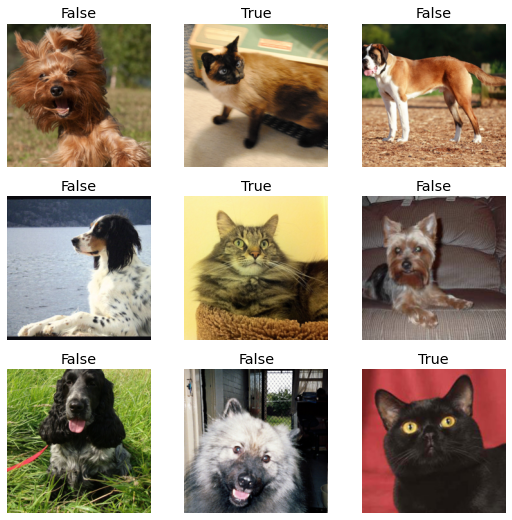

In [17]:
# show_batch shows us a batch of the images used to train our model
dls.show_batch(max_n=9)

In [18]:
# we create
# error_rate is defined as 1 - accuracy
# Q: how is accuracy computed? 
learn = cnn_learner(dls, resnet18, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [19]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.172745,0.036274,0.014885,00:49


epoch,train_loss,valid_loss,error_rate,time
0,0.063945,0.029878,0.010149,00:52
1,0.035256,0.035263,0.010825,00:52
2,0.025785,0.019749,0.010149,00:52
3,0.014096,0.012611,0.004736,00:51
4,0.008670,0.013166,0.005413,00:50


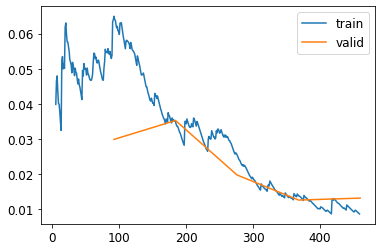

In [20]:
learn.recorder.plot_loss()

In [27]:
files = get_image_files(path)
len(files)

7390

chihuahua_129.jpg


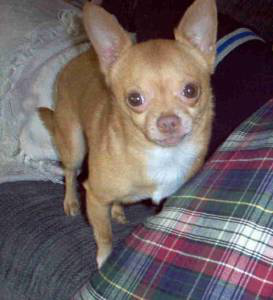

In [38]:
print(files[0].name)
Image.open(files[0])

Bombay_48.jpg


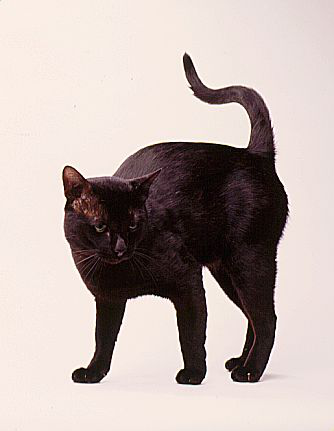

In [39]:
print(files[6].name)
Image.open(files[6])

In [35]:
learn.predict(files[0])

('False', TensorImage(0), TensorImage([1.0000e+00, 3.7572e-08]))

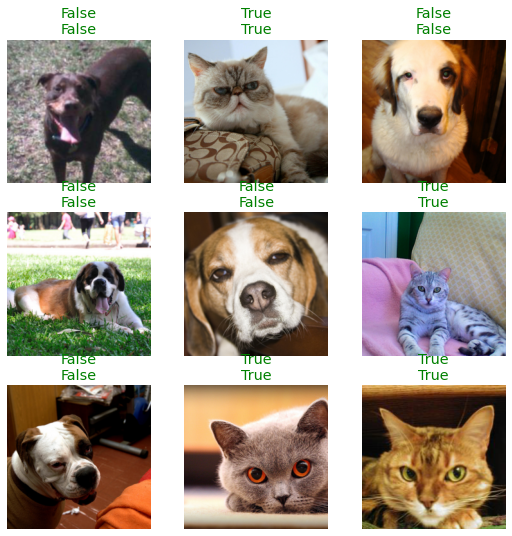

In [36]:
learn.show_results()

In [37]:
?learn.show_results

In [40]:
# let's inspect the architecture of the  Resnet18 PyTorch model 
# https://towardsdatascience.com/residual-network-implementing-resnet-a7da63c7b278

### Questions
"""
* What does Sequential mean? 

* Look up the documentation of PyTorch Conv2d to interpret

  Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

* What is the BatchNorm2d layer doing? What are epsilon and momentum? 

  https://machinelearningmastery.com/batch-normalization-for-training-of-deep-neural-networks/#:~:text=Batch%20normalization%20is%20a%20technique,required%20to%20train%20deep%20networks.
  https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html

* What happens to negative values that go through the ReLu layer?

* What is MaxPool2d doing?


"""
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  